In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [7]:
data= pd.read_csv("SMOTE_dataset.csv", index_col = 0)
data.head()

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,charging_rate_lag3,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,discharging_rate_lag3,charge_cycle_time_below_12,avg_time_charging_lag4,...,discharging_rate_lag6_median,discharging_rate_lag8_median,avg_time_charging_lag12_random,avg_time_discharging_lag12_random,avg_time_charging_lag13_random,avg_time_discharging_lag13_random,avg_time_charging_lag14_random,avg_time_discharging_lag14_random,Days,fail_7
0,0.044546,0.409384,0.080534,0.890524,0.037009,0.828327,0.136601,0.365791,False,0.024585,...,0.622073,0.747085,0.024805,0.041633,0.024729,0.028677,0.028984,0.042778,0.686567,0
1,0.432996,0.041909,0.076458,0.891102,0.597424,0.053068,0.047526,0.384668,False,0.129345,...,0.543742,0.748188,0.093281,0.168223,0.176043,0.340139,0.030757,0.065392,0.582090,0
2,0.049358,0.040683,0.055336,0.884205,0.044314,0.045057,0.028665,0.340314,False,0.267046,...,0.605585,0.753230,0.026202,0.038698,0.022890,0.032476,0.221858,0.385565,0.562189,0
3,0.038870,0.396504,0.441206,0.890409,0.032779,0.688786,0.558263,0.382947,False,0.021194,...,0.599664,0.749081,0.021311,0.033805,0.101397,0.176052,0.028452,0.035711,0.711443,0
4,0.044299,0.431156,0.056695,0.889985,0.040085,0.643910,0.025490,0.386964,True,0.452949,...,0.605451,0.721609,0.027949,0.045725,0.210149,0.452759,0.176033,0.347875,0.800995,0


In [9]:
target = data["fail_7"]
features = data.drop(columns = ["fail_7"])
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

In [10]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [11]:
sel.get_support()

array([False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True])

In [12]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

8

In [13]:
print(selected_feat)

Index(['charging_rate_lag3', 'discharging_rate_lag3',
       'charge_cycle_time_below_12', 'total_off_time', 'number_times_restart',
       'avg_volt_change_charging', 'avg_volt_change_discharging', 'Days'],
      dtype='object')


<AxesSubplot:>

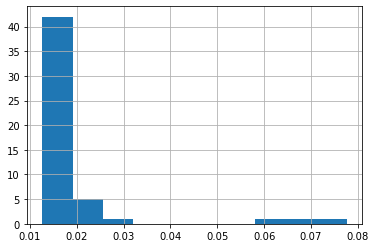

In [22]:
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()